In [12]:
import sys
# Add the src directory to the Python path
sys.path.insert(0, '../src')

In [13]:
from datetime import datetime

from botcoin.profilers.stock import StockProfiler
from botcoin.utils.stream_data import generate_price_stream
from botcoin.utils.visual.statistics import plot_kde_with_stats, plot_price_histogram_with_stats

In [14]:
symbol = "T"
profiler = StockProfiler()

In [15]:
profile = profiler.profile(symbol)

c:\Users\runfei\projects\Botcoin\notebooks\../src\botcoin\data\historical.py:167: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
2025-06-28 00:15:15,252 - DataManager - INFO: Data saved to data\T_ohlcv_1m.parquet
c:\Users\runfei\projects\Botcoin\notebooks\../src\botcoin\data\historical.py:167: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
2025-06-28 00:15:16,120 - DataManager - INFO: Data saved to data\T_ohlcv_1m.parquet
c:\Users\runfei\projects\Botcoin\notebooks\../src\botcoin\data\historical.py:167: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
2025-06-28 00:15:16,900 - DataManager - INFO: Data saved to data\T_ohlcv_1m.parquet
c:\Users\runfei\projects\Botcoin\notebooks\../src\botcoin\data\historical.py:167: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
2025-06-28 00:15:17,699 - Da

In [16]:
profiler.print_profile(profile)

Symbol: T
IPO Date: 1983-11-21
Quote: 28.08
Annual Return: 11.82%
Sharpe Ratio: 0.44
Sortino Ratio: 0.65
Beta: 0.41


In [17]:
returns_1min = profile["1min_returns"]
print(f"Profile for {symbol}:")
print(f"Number of 1-minute returns for {symbol}: {len(returns_1min)}")
print(f"Mean 1-minute returns for {symbol}: {returns_1min.mean():.6f}")
print(f"Standard deviation of 1-minute returns for {symbol}: {returns_1min.std():.6f}")
print(f"Max 1-minute return for {symbol}: {returns_1min.max():.6f}")
print(f"Min 1-minute return for {symbol}: {returns_1min.min():.6f}")

Profile for T:
Number of 1-minute returns for T: 7297
Mean 1-minute returns for T: -0.000000
Standard deviation of 1-minute returns for T: 0.000492
Max 1-minute return for T: 0.006655
Min 1-minute return for T: -0.003383


In [18]:
returns_1d = profile["1d_returns"]
print(f"Number of 1-day returns for {symbol}: {len(returns_1d)}")
print(f"Mean 1-day returns for {symbol}: {returns_1d.mean():.6f}")
print(f"Standard deviation of 1-day returns for {symbol}: {returns_1d.std():.6f}")
print(f"Max 1-day return for {symbol}: {returns_1d.max():.6f}")
print(f"Min 1-day return for {symbol}: {returns_1d.min():.6f}")

Number of 1-day returns for T: 1268
Mean 1-day returns for T: 0.000455
Standard deviation of 1-day returns for T: 0.012128
Max 1-day return for T: 0.065528
Min 1-day return for T: -0.101186


In [19]:
# Compute percentage of data within ±1 std
data = returns_1d
mean = data.mean()
std = data.std()
lower_bound = mean - std
upper_bound = mean + std
within_std = data[(data >= lower_bound) & (data <= upper_bound)]
percentage_within_std = len(within_std) / len(data) * 100

print(f"Percentage of 1-day returns within ±1 std for {symbol}: {percentage_within_std:.2f}%")

Percentage of 1-day returns within ±1 std for T: 76.42%


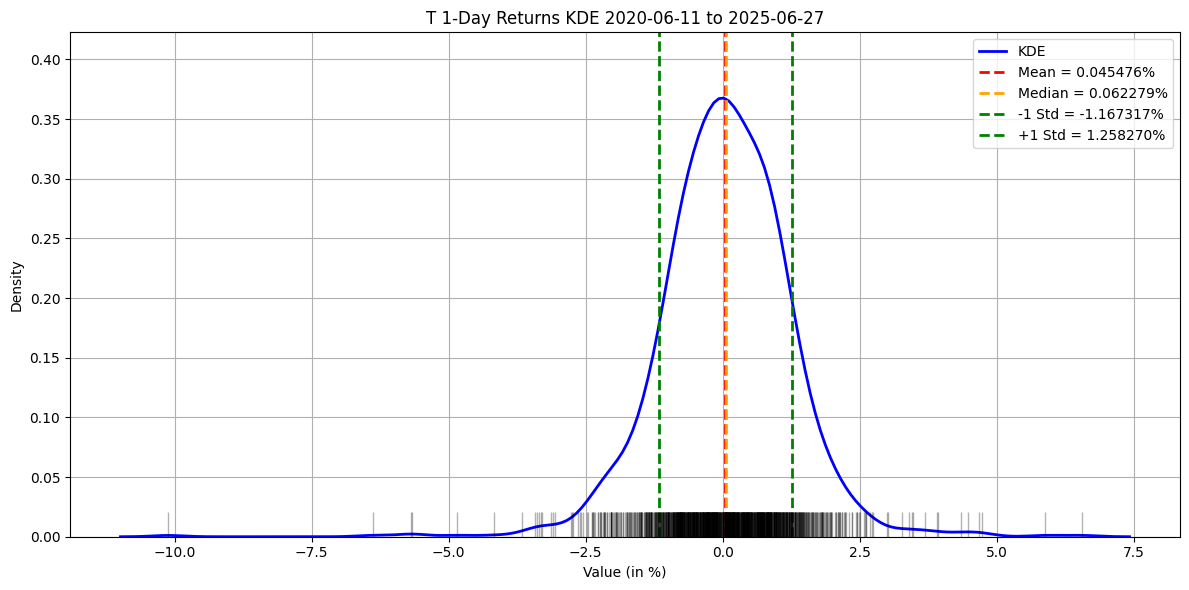

In [20]:
# Compute the date range of the 1-day returns
start_date = data.index.min().date()
end_date = data.index.max().date()

plot_kde_with_stats(returns_1d, title=f"{symbol} 1-Day Returns KDE {start_date} to {end_date}")


In [21]:
ohlcv = profile['ohlcv_1min']

prices = generate_price_stream(ohlcv, candle_duration='1min', avg_freq_per_minute=10)

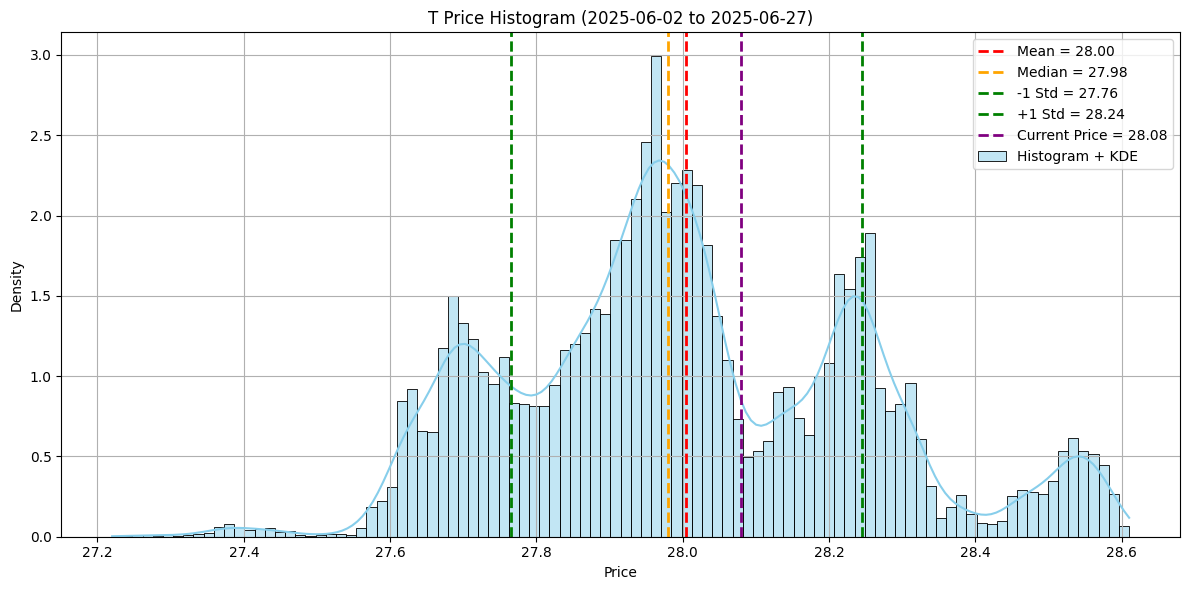

In [22]:
start_time = prices.index.min()
end_time = prices.index.max()

# convert Unix timestamps to datetime objects
start_date = datetime.fromtimestamp(start_time).date()
end_date = datetime.fromtimestamp(end_time).date()

current_price = profile['quote']

plot_price_histogram_with_stats(prices['price'], current_price=current_price, title=f"{symbol} Price Histogram ({start_date} to {end_date})", bins=100)